In [1]:
import anndata as ad
import numpy as np
import scipy
import pandas as pd
import torch
import scanpy as sc

In [2]:
import cellrank as cr

In [3]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)

In [4]:
adata = ad.read_h5ad("/Users/apple/Desktop/KB/data/BiddyData/biddy_fulldata.h5ad")

In [5]:
# save the full data into h5ad file
# adata.write("biddy_fulldata.h5ad")

In [6]:
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata,n_top_genes=2000)


In [7]:
adata = adata[:, adata.var.highly_variable]

In [8]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

In [9]:
adata.obs_keys()

['timecourse',
 'reprogramming_day',
 'reprogramming',
 'cell_type',
 'cell_cycle',
 'cluster',
 'monocle_state',
 'pseudotime',
 'CellTagD0_85k',
 'CellTagD3_85k',
 'CellTagD13_85k',
 'CellTagD0_48k',
 'CellTagD3_48k',
 'CellTagD13_48k']

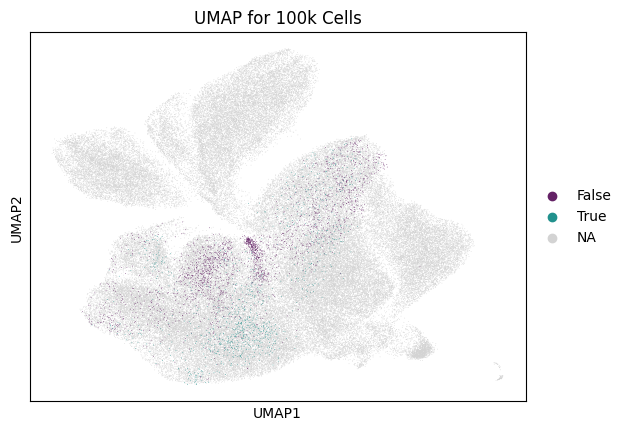

In [10]:
sc.pl.umap(adata,color='reprogramming', title= "UMAP for 100k Cells")

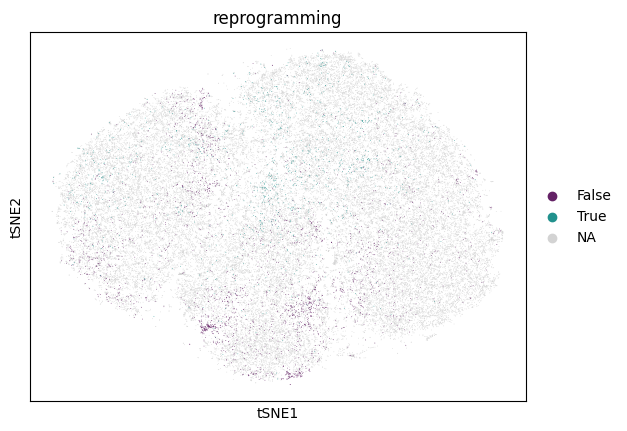

In [11]:
sc.pl.embedding(adata, basis="tsne", color="reprogramming")

Filter cells

In [12]:
nan_rows = adata.obs['CellTagD0_48k'].isna()
print("number of cells without CellTagD0_48k barcode: ",sum(nan_rows))
adata_filter = adata[~nan_rows].copy()
print("adata shape after filtering out nans: ", adata_filter.shape)

number of cells without CellTagD0_48k barcode:  93792
adata shape after filtering out nans:  (10887, 2000)


In [13]:
print("number of CellTagD0_48k lineages: ", len(adata_filter.obs["CellTagD0_48k"].unique()))
value_counts = adata_filter.obs['CellTagD0_48k'].value_counts()
valid_tags = value_counts[value_counts >= 5].index

# Filter the adata_filter object
adata_filter = adata_filter[adata_filter.obs['CellTagD0_48k'].isin(valid_tags)].copy()

print("number of CellTagD0_48k lineages that has at least 5 cells: ", len(valid_tags))
print(f"Number of observations after filtering: {adata_filter.n_obs}")

number of CellTagD0_48k lineages:  540
number of CellTagD0_48k lineages that has at least 5 cells:  248
Number of observations after filtering: 10215


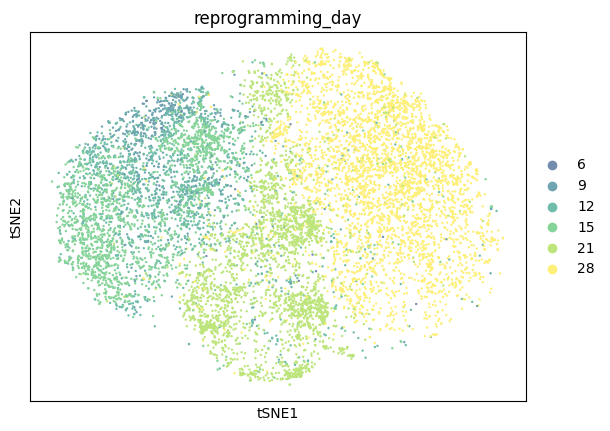

In [14]:
sc.pl.embedding(adata_filter, basis="tsne", color="reprogramming_day")

In [15]:
sc.tl.pca(adata_filter, svd_solver='arpack')
sc.pp.neighbors(adata_filter, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_filter)

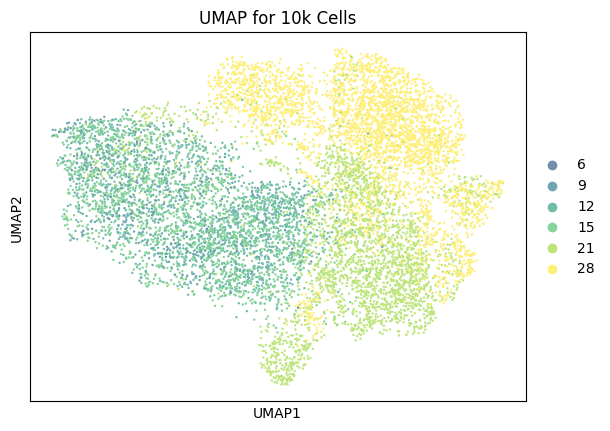

In [16]:
sc.pl.umap(adata_filter,color='reprogramming_day', title= "UMAP for 10k Cells")

In [20]:
adata_filter.obs_keys()

['timecourse',
 'reprogramming_day',
 'reprogramming',
 'cell_type',
 'cell_cycle',
 'cluster',
 'monocle_state',
 'pseudotime',
 'CellTagD0_85k',
 'CellTagD3_85k',
 'CellTagD13_85k',
 'CellTagD0_48k',
 'CellTagD3_48k',
 'CellTagD13_48k',
 'clone_id']

In [19]:
adata_filter.obs["clone_id"] = adata_filter.obs["CellTagD0_48k"]

In [22]:
adata_filter.write("biddy_10215_2000.h5ad")

In [31]:
adata_filter.obs["clone_id"].value_counts()
adata_filter___ = adata_filter[adata_filter.obs["clone_id"]!=493.0].copy()

In [32]:
adata_filter___.obs["clone_id"].value_counts()

clone_id
2352.0    945
487.0     651
666.0     588
2721.0    341
709.0     310
         ... 
657.0       5
659.0       5
2585.0      5
286.0       5
2886.0      5
Name: count, Length: 247, dtype: int64